![pandas](https://upload.wikimedia.org/wikipedia/commons/4/45/Pandas_logo.png)

# Topics

- Series vs. DataFrames
- Querying, indexing, slicing
- Combining and splitting data
- Handling missing data
- Continuous vs. categorical data

## Workshop: Pandas and Data Manipulation

In this workshop, we will use pandas to load, describe, and query datasets.

### Cheatsheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

### References

1. https://pandas.pydata.org/pandas-docs/stable/  
2. Python Data Science Handbook by Jake VanderPlas
3. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney
4. https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html


### Installation

Windows: Start Button -> "Anaconda Prompt"

Ubuntu / MacOS: conda should be in your path

Activate the environment

```
conda activate mldds01
```

Pandas should already be installed. If not, install it:

```
conda install pandas
```

Tip: You can check the versions installed by calling Python with a script:
```
python -c "import pandas; print(pandas.__version__)"
```

### SGD to USD Exchange Rate Data

Similar to the NumPy workshop, we'll use the historical SGD to USD exchange rates from data.gov.sg to demonstrate some Pandas concepts.

In [1]:
from IPython.display import IFrame

IFrame('https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual/resource/f927c39b-3b44-492e-8b54-174e775e0d98/view/43207b9f-1554-4afb-98fe-80dfdd6bb4f6', width=600, height=400)

### Download Instructions

You should already have this dataset from the NumPy workshop. If not, here are the instructions:

1. Go to https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual
2. Click on the `Download` button
3. Unzip and extract the `.csv` file. Note the path for use below.

Note: on Windows, you may wish to rename the unzipped folder path to something shorter.

### Import the package

In [2]:
import pandas as pd

In [3]:
pd?

### Two main data structures

1. Series
2. DataFrame

### Series
```
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- Similar to 1-d numpy array but with more flexible explicit indexing
- Has two components : index and value for each element
- A bit similar concept as dictionary
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html')

### DataFrame
```
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```
- The primary pandas data structure
- Tabular format similar to excel
- Two-dimensional, potentially heterogeneous tabular data
- structure with labeled axes (rows and columns). Row and columns index
- Can be thought of as a dict-like container for Series objects. 
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### Read data from CSV to a Series

You can use `pandas.read_csv` to read data into:
- A Series, if the data contains only 1 column and you specify the `squeeze=True` option, or
- A DataFrame, for any number of columns. This is the default behavior because the DataFrame is the most flexible.

[more here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
# Read data into a series
#
# parse_dates: which column(s) to parse dates
# index_col: which zeroth indexed column to use the index
# infer_datetime_format may speed up the date parsing
sgd_usd_series = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                             parse_dates=['date'], index_col=0, infer_datetime_format=True,
                             squeeze=True)

# inspect the first 10 values
sgd_usd_series.head()

date
1988-01-08    2.0443
1988-01-15    2.0313
1988-01-22    2.0205
1988-01-29    2.0182
1988-02-05    2.0160
Name: exchange_rate_usd, dtype: float64

In [5]:
pd.read_csv?

In [6]:
sgd_usd_series.describe()

count    3993.000000
mean        1.494808
std         0.197901
min         1.200900
25%         1.303300
50%         1.462200
75%         1.669100
max         2.050300
Name: exchange_rate_usd, dtype: float64

In [7]:
# Read data into a data frame
sgd_usd_df = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                         parse_dates=['date'], index_col=0, infer_datetime_format=True)

# inspect the first 10 values
sgd_usd_df.head()

,exchange_rate_usd
date,
1988-01-08,2.0443
1988-01-15,2.0313
1988-01-22,2.0205
1988-01-29,2.0182
1988-02-05,2.0160


In [8]:
sgd_usd_df.describe()

,exchange_rate_usd
count,3993.000000
mean,1.494808
std,0.197901
min,1.200900
25%,1.303300
50%,1.462200
75%,1.669100
max,2.050300


In [9]:
# Read data without parsing dates
temp = pd.read_csv('/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                   index_col=0)

# inspect the first 10 values
temp.head(10)

,exchange_rate_usd
date,
1988-01-08,2.0443
1988-01-15,2.0313
1988-01-22,2.0205
1988-01-29,2.0182
1988-02-05,2.0160
1988-02-12,2.0173
1988-02-19,2.0189
1988-02-26,2.0130
1988-03-04,2.0154


In [10]:
# dtype of index is a string
temp.index

Index(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29', '1988-02-05',
       '1988-02-12', '1988-02-19', '1988-02-26', '1988-03-04', '1988-03-11',
       ...
       '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09', '2015-10-12',
       '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16', '2015-10-19'],
      dtype='object', name='date', length=3993)

In [11]:
# with parse_dates = ['date'], dtype of index is a datetime64
sgd_usd_df.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

In [12]:
# read_csv has many other functions for reading in CSV data
# such as custom parsing functions, or custom delimiters
pd.read_csv?

### Get values or indices

Series
- use series.values
- use series.index

DataFrame
- use df.values
- use df.index

Note: these are properties, not function calls with ()

For this dataset:
- Series.values is a 1 dimensional numpy.array
- DataFrame.values is not. It's actually 2 dimensional:

    number of samples (rows) x 1 (column)
   
This is because DataFrame is a more general data structure that can hold more columns.

In [13]:
sgd_usd_series.values

array([2.0443, 2.0313, 2.0205, ..., 1.3763, 1.3834, 1.3827])

In [14]:
sgd_usd_df.values

array([[2.0443],
       [2.0313],
       [2.0205],
       ...,
       [1.3763],
       [1.3834],
       [1.3827]])

In [15]:
sgd_usd_series.values.shape

(3993,)

In [16]:
sgd_usd_series.values.ndim # rank = 1

1

In [17]:
sgd_usd_df.values.shape

(3993, 1)

In [18]:
sgd_usd_df.values.ndim # rank = 2

2

In [19]:
# Tip: you can flatten the 3993 x 1 numpy array
sgd_usd_df.values.flatten()

array([2.0443, 2.0313, 2.0205, ..., 1.3763, 1.3834, 1.3827])

The .index is the same whether it is a Series or a DataFrame

In [20]:
sgd_usd_series.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

In [21]:
sgd_usd_df.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

### Get the summary

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|df.columns | Describe DataFrame columns|
|df.info() | Information on a DataFrame |
|s.count(), df.count() | Number of non-NA values|
|s.count() | Number of non-NA values|

Note: these are from the Cheatsheet. Series supports fewer methods.

### Get statistics

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|s.sum(), df.sum() | Sum of values|
|s.cumsum(), df.cumsum() | Cummulative sum of values |
|s.min()/s.max(), df.min()/df.max() | Minimum/maximum values|
|s.idxmin()/series.idxmax(), df.idxmin()/df.idxmax() | Minimum/Maximum index value|
|s.describe(), df.describe() | Summary statistics |
|s.mean(), df.mean() | Mean of values |
|s.median(), df.median() | Median of values | 

Note: these are from the Cheatsheet

### Joins

Let's say we need to also show Singapore Dollar and Renminbi (CNY) exchange rates, but from a different data set.

This dataset is already downloaded for you in the `data` folder.

In [22]:
# data source: https://www.exchangerates.org.uk
sgd_cny_df = pd.read_csv('data/sgd_cny_rates_daily.csv',
                          parse_dates=True, index_col=0, infer_datetime_format=True)
print('First 5 entries:')
sgd_cny_df.head(5)

First 5 entries:


,Singapore Dollar to Chinese Yuan
Date,
2018-05-27,4.7499
2018-05-26,4.7620
2018-05-25,4.7610
2018-05-24,4.7618
2018-05-23,4.7553


In [23]:
sgd_cny_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06
Data columns (total 1 columns):
Singapore Dollar to Chinese Yuan    3224 non-null float64
dtypes: float64(1)
memory usage: 50.4 KB


In [24]:
pd.DataFrame?

In [25]:
sgd_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19
Data columns (total 1 columns):
exchange_rate_usd    3993 non-null float64
dtypes: float64(1)
memory usage: 62.4 KB


`sgd_cny_df`: DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06

`sgd_usd_df`: DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19

- have different date ranges
- one is in decreasing time order, the other is increasing time order 

Pandas DataFrames make it easy to join these datasets together based on index.

You can do this without looping over the data, using `DataFrame.join()`

[more info..](https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index)

In [26]:
sgd_usd_df.join?

In [27]:
# Default join is an `left` join, where the index of the left series (`sgd_usd_df`) is preserved.

sgd_usd_cny = sgd_usd_df.join(sgd_cny_df)
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
1988-01-08,2.0443,NaN
1988-01-15,2.0313,NaN
1988-01-22,2.0205,NaN
1988-01-29,2.0182,NaN
1988-02-05,2.0160,NaN
1988-02-12,2.0173,NaN
1988-02-19,2.0189,NaN
1988-02-26,2.0130,NaN
1988-03-04,2.0154,NaN
1988-03-11,2.0131,NaN


We can remove the NaN entries using dropna()

In [28]:
sgd_usd_cny = sgd_usd_cny.dropna()
#sgd_usd_cny.loc[sgd_usd_cny.index[0]][:]
#df2 = pd.DataFrame(sgd_usd_cny.loc[sgd_usd_cny.index[0]][:])
#df2.stack().reset_index()
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039
2009-10-12,1.4014,4.8791
2009-10-13,1.3972,4.8871
2009-10-14,1.3939,4.9050
2009-10-15,1.3861,4.9157
2009-10-16,1.3884,4.9051
2009-10-19,1.3953,4.9037


The result is a DataFrame with entries where both exchange rates are present.

Entries where either SGD-USD or SGD-CNY are missing are excluded.

Note that even though the index for the series are in different order, join will still work because it matches the individual index values

### When in doubt, visualize

Let's visualize what we just did by plotting the dataframes.

You should have already installed matplotlib. If not, do this:
```
conda install matplotlib
```

In [29]:
# Find the names of the columns
sgd_usd_cny.columns

Index(['exchange_rate_usd', 'Singapore Dollar to Chinese Yuan'], dtype='object')

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,15),
                              sharex=True) # common x-axis for all subplots

ax1.set_title('Original series')
ax1.plot(sgd_usd_df, label='SGD/USD')
ax1.plot(sgd_cny_df, label='SGD/CNY')
ax1.legend(loc='upper center', shadow=True, fontsize='x-large')

ax2.set_title('After join() and dropna()')
ax2.plot(sgd_usd_cny['exchange_rate_usd'], label='SGD/USD')
ax2.plot(sgd_usd_cny['Singapore Dollar to Chinese Yuan'], label='SGD/CNY')
ax2.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

<Figure size 2000x1500 with 2 Axes>

In [31]:
ax1?

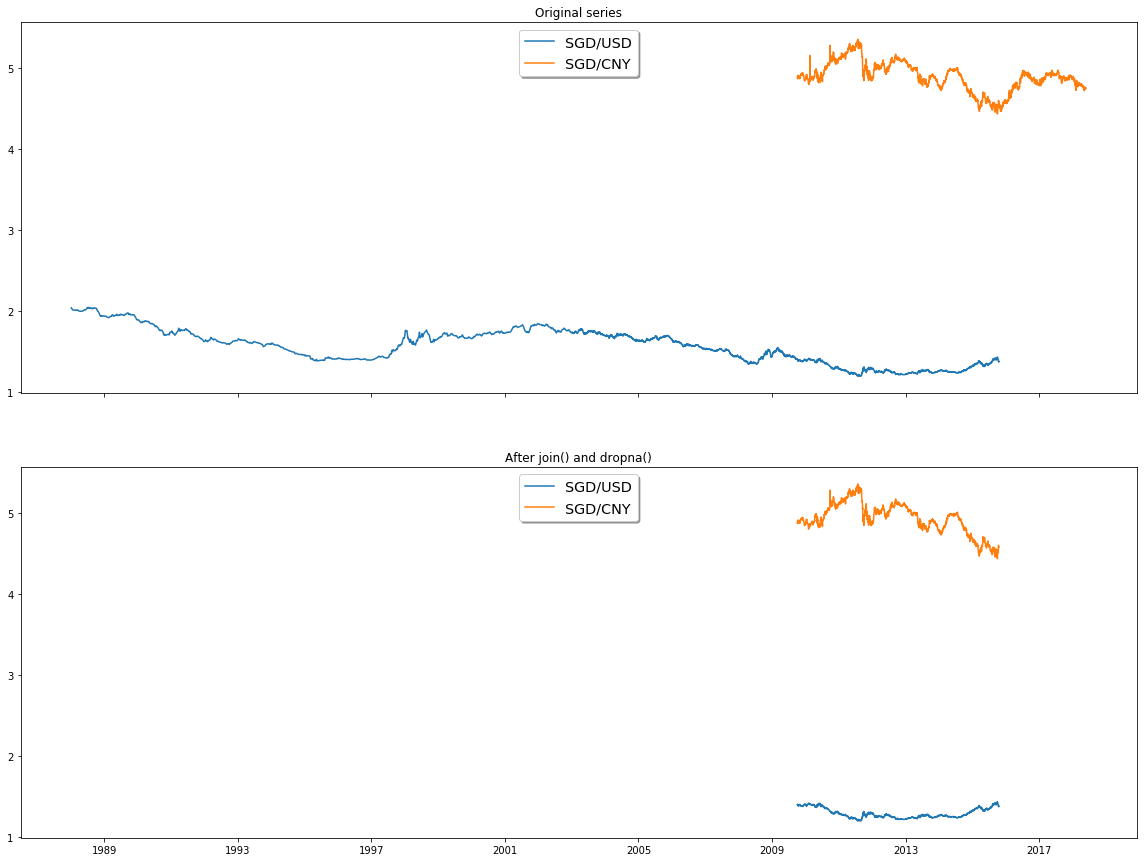

In [32]:
sgd_cny_usd = sgd_cny_df.join(sgd_usd_df).dropna()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,15),
                              sharex=True) # common x-axis for all subplots

ax1.set_title('Original series')
ax1.plot(sgd_usd_df, label='SGD/USD')
ax1.plot(sgd_cny_df, label='SGD/CNY')
ax1.legend(loc='upper center', shadow=True, fontsize='x-large')

ax2.set_title('After join() and dropna()')
ax2.plot(sgd_cny_usd['exchange_rate_usd'], label='SGD/USD')
ax2.plot(sgd_cny_usd['Singapore Dollar to Chinese Yuan'], label='SGD/CNY')
ax2.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

### Pandas, like SQL

If you have worked with SQL or databases before, the DataFrame.join() is conceptually the same as SQL.

[Here's](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) a guide that compares Pandas with SQL.

This SQL:
```
SELECT *
FROM tips
WHERE time = 'Dinner' AND tip > 5.00;

```
Becomes this in pandas:

```
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)]
```

We'll do an example with queries to demonstrate how you can think of Pandas as conceptually equivalent to SQL.

### Exercise: Querying a DataFrame

Let's say you want to query a DataFrame using something equivalent to this SQL syntax:

```
SELECT *
FROM sgd_usd_cny
WHERE date >= '2012-01-01' AND date < '2013-01-01';
```

What will you use in Pandas?

In [33]:
# Use pandas to find all exchange rates from 2012, for the sgd_usd_cny DataFrame
#
# Refer to https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
#
# Hint 1: use pd.to_datetime
# start = pd.to_datetime('2012-01-01')
# end = pd.to_datetime('2013-01-01')
#
# Hint 2: use sgd_usd_cny.index to compare against the date time
#
# Hint 3: add parenthesis for the boolean conditions

start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('Monday 2013-01-01')

sgd_usd_cny[(sgd_usd_cny.index >= start) & (sgd_usd_cny.index < end)]

sgd_usd_cny['2015']

sgd_usd_cny[sgd_usd_cny['exchange_rate_usd'] > 1.4]

sgd_usd_cny[sgd_usd_cny.exchange_rate_usd > 1.4]

sgd_usd_cny[sgd_usd_cny['Singapore Dollar to Chinese Yuan'] > 4]

sgd_usd_cny.columns

sgd_usd_cny[sgd_usd_cny[sgd_usd_cny.columns[0]] > 1.4]

sgd_usd_cny['Feb 2015']


,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-02-02,1.3545,4.6297
2015-02-03,1.3527,4.6490
2015-02-04,1.3450,4.6334
2015-02-05,1.3476,4.6496
2015-02-06,1.3449,4.6150
2015-02-09,1.3528,4.6136
2015-02-10,1.3528,4.6059
2015-02-11,1.3564,4.5899
2015-02-12,1.3617,4.6064
2015-02-13,1.3561,4.6037


### Indexing and Slicing: iloc, loc

|  |  |
|--|--|
|iloc|Select by position|
|loc|Select by label|
|iat|Get scalar value by position (fast iloc)
|at|Get scalar value by label (fast loc)|

![loc iloc](assets/pandas/Pandas-selections-and-indexing.png)
(image: shanelynn.ie)

In [34]:
sgd_usd_cny.iloc[1]

exchange_rate_usd                   1.4031
Singapore Dollar to Chinese Yuan    4.8754
Name: 2009-10-07 00:00:00, dtype: float64

In [35]:
sgd_usd_cny.iloc[0:1,0:2]

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734


### loc, at

In [36]:
# sgd_usd_cny.loc[:4] # error (because index is time, not integer) 

In [37]:
# use a DateTimeIndex for row selector
sgd_usd_cny.loc[pd.to_datetime('2009-10-08'), :]

exchange_rate_usd                   1.3949
Singapore Dollar to Chinese Yuan    4.9082
Name: 2009-10-08 00:00:00, dtype: float64

In [38]:
# use a column selector
sgd_usd_cny.loc[pd.to_datetime('2009-10-08'), 'exchange_rate_usd']

1.3949

In [39]:
# fast single-value access using .at
sgd_usd_cny.at[pd.to_datetime('2009-10-08'), 'exchange_rate_usd']

1.3949

### iloc, iat

In [40]:
sgd_usd_cny.iloc[1, :] # select by row position

exchange_rate_usd                   1.4031
Singapore Dollar to Chinese Yuan    4.8754
Name: 2009-10-07 00:00:00, dtype: float64

In [41]:
sgd_usd_cny.iloc[:]['exchange_rate_usd'] # select by row position, column name

f = sgd_usd_cny.iloc[:]

f['exchange_rate_usd']

2009-10-06    1.4046
2009-10-07    1.4031
2009-10-08    1.3949
2009-10-09    1.3918
2009-10-12    1.4014
2009-10-13    1.3972
2009-10-14    1.3939
2009-10-15    1.3861
2009-10-16    1.3884
2009-10-19    1.3953
2009-10-20    1.3882
2009-10-21    1.3951
2009-10-22    1.3964
2009-10-23    1.3928
2009-10-26    1.3925
2009-10-27    1.3976
2009-10-28    1.3995
2009-10-29    1.4039
2009-10-30    1.3968
2009-11-02    1.4004
2009-11-03    1.3976
2009-11-04    1.3998
2009-11-05    1.3975
2009-11-06    1.3946
2009-11-09    1.3884
2009-11-10    1.3882
2009-11-11    1.3874
2009-11-12    1.3865
2009-11-13    1.3890
2009-11-16    1.3848
               ...  
2015-09-04    1.4183
2015-09-07    1.4249
2015-09-08    1.4262
2015-09-09    1.4140
2015-09-10    1.4212
2015-09-14    1.4104
2015-09-15    1.4011
2015-09-16    1.4008
2015-09-17    1.3988
2015-09-18    1.4003
2015-09-21    1.4050
2015-09-22    1.4128
2015-09-23    1.4219
2015-09-25    1.4243
2015-09-28    1.4259
2015-09-29    1.4319
2015-09-30   

In [42]:
sgd_usd_cny.iat[1, 0] # select by row position, column position

1.4031

In [43]:
sgd_usd_cny.iloc[:4, :] # select by row slice

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039


### Combining with boolean conditions

In [44]:
# logical / boolean row index
sgd_usd_cny.loc[sgd_usd_cny.exchange_rate_usd < 1.21, :]

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2011-07-25,1.2089,5.3394
2011-07-26,1.2048,5.3505
2011-07-27,1.2009,5.3500
2011-07-28,1.2036,5.3595
2011-07-29,1.2041,5.3467
2011-08-01,1.2015,5.3529
2011-08-02,1.2035,5.3267
2011-08-03,1.2087,5.3376
2011-08-04,1.2081,5.2446
2011-08-15,1.2070,5.3233


In [45]:
# more selectors
print(sgd_usd_cny.loc[sgd_usd_cny.exchange_rate_usd > 1.425, 'Singapore Dollar to Chinese Yuan'])

2015-09-08    4.4912
2015-09-28    4.4569
2015-09-29    4.4568
2015-09-30    4.4652
2015-10-01    4.4436
2015-10-02    4.4374
2015-10-05    4.4740
Name: Singapore Dollar to Chinese Yuan, dtype: float64


In [46]:
# iloc does not support boolean indexing, because it is NOT label-based

# sgd_usd_cny.iloc[sgd_usd_cny.exchange_rate_usd < 1.21, :] # error

### Adding and removing rows / columns

|  |  |
|--|--|
|s.drop(), df.drop()| Drop row (axis=0)|
|s.drop('col', axis=1), df.drop('col', axis=1)| Drop column (axis=1)|
|pd.concat([s1, s2], axis=0), pd.concat([df1, df2], axis=0)|Concatenate rows (axis=0)|
|pd.concat([s1, s2], axis=1), pd.concat([df1, df2], axis=1)|Concatenate columns (axis=1)|

In [47]:
pd.concat?

In [48]:
pd.DataFrame.drop?

In [49]:
pd.Series.drop?

In [50]:
# Append a few rows of empty data
index = pd.date_range(start='2015-10-20', end='2015-10-22')

new_df = pd.DataFrame(index=index,
                      columns=sgd_usd_cny.columns)

#new_df
result = pd.concat([sgd_usd_cny, new_df], axis=0) # axis=0 for rows
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,NaN,NaN
2015-10-21,NaN,NaN
2015-10-22,NaN,NaN


In [51]:
# Drop the rows
index = pd.date_range(start='2015-10-20', end='2015-10-22')
index

result.drop(index, inplace=True)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-06,1.4237,4.4741
2015-10-07,1.4243,4.5019
2015-10-08,1.4140,4.5229
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


In [52]:
# Pandas can enforce duplicate checks if we pass in the verify_integrity=True flag to pd.concat.  
# This check can be expensive.  Here's the code snippet that demonstrates this.
import pandas as pd

# load data
sgd_usd_df1 = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                        parse_dates=['date'], index_col=0, infer_datetime_format=True)

sgd_usd_df1.head(10)

# construct a dataframe with the same values as the first row
index = pd.date_range(start='1988-01-08', end='1988-01-08')

first_row = sgd_usd_df.iloc[0]

new_df = pd.DataFrame(data=first_row.values,
                     index=index,
                     columns=sgd_usd_df.columns)
new_df

# 1. by default, this will allow duplicates
result = pd.concat([new_df, sgd_usd_df], axis=0) # axis=0 for rows
result.head(10)

import numpy as np
new_df = pd.DataFrame(data=np.array([8888]),
                     index=index,
                     columns=sgd_usd_df.columns)
new_df

# 1. by default, this will allow duplicates
result = pd.concat([new_df, sgd_usd_df], axis=0) # axis=0 for rows
result.head(10)

sgd_usd_df.drop_duplicates(inplace=True, keep='first')
sgd_usd_df

#sgd_usd_df.drop_duplicates?

,exchange_rate_usd
date,
1988-01-08,2.0443
1988-01-15,2.0313
1988-01-22,2.0205
1988-01-29,2.0182
1988-02-05,2.0160
1988-02-12,2.0173
1988-02-19,2.0189
1988-02-26,2.0130
1988-03-04,2.0154


### Exercises: add and remove columns

1. Add a new column called 'SGD to Euro' with empty values
2. Drop the column you just added

In [53]:
# Add a new column called 'SGD to Euro', with empty values
#
# Hint 1: use index=sgd_usd_cny.index
# Hint 2: what value should axis be in pd.concat?
#

new_df = pd.DataFrame(index=sgd_usd_cny.index,
                      columns=['SGD to Euro'])

print(new_df.shape)

result = pd.concat([sgd_usd_cny, new_df], axis=1) # axis=1 for col
print(result.head())

(1562, 1)
            exchange_rate_usd  Singapore Dollar to Chinese Yuan SGD to Euro
2009-10-06             1.4046                            4.8734         NaN
2009-10-07             1.4031                            4.8754         NaN
2009-10-08             1.3949                            4.9082         NaN
2009-10-09             1.3918                            4.9039         NaN
2009-10-12             1.4014                            4.8791         NaN


In [54]:


# Drop the column you just added
# 
# Hint: use inplace=True so that the change is performed in place
# Hint: what value should axis be?
#
result.drop(labels=['SGD to Euro'], inplace=True, axis=1)
result


,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039
2009-10-12,1.4014,4.8791
2009-10-13,1.3972,4.8871
2009-10-14,1.3939,4.9050
2009-10-15,1.3861,4.9157
2009-10-16,1.3884,4.9051
2009-10-19,1.3953,4.9037


### Missing data

We saw how to add columns and rows without any data.  Now we'll explore how to deal with the missing data.

Here are some ways:

|  |  |
|--|--|
|dropna|Drop missing values|
|fillna(new_value)|Fill missing values with new_value|
|interpolate()|Use linear interpolation|

We've already seen how dropna() works.

In [55]:
pd.DataFrame.dropna?

In [56]:
pd.DataFrame.fillna?

In [57]:
pd.DataFrame.interpolate?

In [58]:
index=pd.date_range(start='2015-10-20', end='2015-10-22')

new_df = pd.DataFrame(index=index,
                      columns=sgd_usd_cny.columns)
result = pd.concat([sgd_usd_cny, new_df], axis=0)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,NaN,NaN
2015-10-21,NaN,NaN
2015-10-22,NaN,NaN


In [59]:
# Dropping the NaN values
result.dropna(inplace=True)

result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-06,1.4237,4.4741
2015-10-07,1.4243,4.5019
2015-10-08,1.4140,4.5229
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


In [60]:
# Filling the NaN values with a meaningful value, such as the median
median = result.median()
result.fillna(median).tail(5)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


In [61]:
# Using linear interpolation
result.interpolate().tail(5)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


### Categorical Data

The previous dataset shows how to use pandas for datasets with continous variables (the exchange rate).

Let's see another dataset that demonstrates how to use pandas for categorical variables (such as classes of things).

We'll use the `Annual Motor Vehicle Population by Vehicle Type` dataset from data.gov.sg.

Reference: https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Download Instructions

1. Go to https://data.gov.sg/dataset/annual-motor-vehicle-population-by-vehicle-type
2. Click on the Download button
3. Unzip and extract the .csv file. Note the path for use below.

In [144]:
df = pd.read_csv('D:/tmp/motor-vehicles/annual-motor-vehicle-population-by-vehicle-type.csv',
                 parse_dates=['year'], index_col=0, infer_datetime_format=True)
df

,category,type,number
year,,,
2005-01-01,Cars & Station-wagons,Private cars,401638
2006-01-01,Cars & Station-wagons,Private cars,421904
2007-01-01,Cars & Station-wagons,Private cars,451745
2008-01-01,Cars & Station-wagons,Private cars,476634
2009-01-01,Cars & Station-wagons,Private cars,497116
2010-01-01,Cars & Station-wagons,Private cars,511125
2011-01-01,Cars & Station-wagons,Private cars,520614
2012-01-01,Cars & Station-wagons,Private cars,535233
2013-01-01,Cars & Station-wagons,Private cars,540063


### Grouping and aggregating categories
Since this series has multiple entries for the same date, we can group rows together using `group_by`.

For example, to find the total number of vehicles per year:

In [161]:
df.groupby(df.index)['number'].sum()

year
2005-01-01    754992
2006-01-01    799373
2007-01-01    851336
2008-01-01    894682
2009-01-01    925518
2010-01-01    945829
2011-01-01    956704
2012-01-01    969910
2013-01-01    974170
2014-01-01    972037
2015-01-01    957246
2016-01-01    956430
2017-01-01    961842
Name: number, dtype: int64

In [171]:
grouped = df.groupby(df.index)

#for key, group in grouped:
    #print(key, group['number'])
    #print(type(group))
    
#seriesgroup = grouped['number']
#for key, group in seriesgroup:
#    print(key, group.sum())
    
#seriesgroup.sum()
seriesgroup.sum()

year
2005-01-01    754992
2006-01-01    799373
2007-01-01    851336
2008-01-01    894682
2009-01-01    925518
2010-01-01    945829
2011-01-01    956704
2012-01-01    969910
2013-01-01    974170
2014-01-01    972037
2015-01-01    957246
2016-01-01    956430
2017-01-01    961842
Name: number, dtype: int64

We can also plot the total number of vehicles per year:

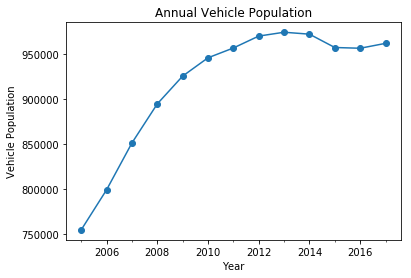

In [175]:
ax = df.groupby(df.index)['number'].sum().plot(marker='o')
ax.set(ylabel='Vehicle Population',
       xlabel='Year',
       title='Annual Vehicle Population')
plt.show()

### Processing per category

In [180]:
df['category']

year
2005-01-01       Cars & Station-wagons
2006-01-01       Cars & Station-wagons
2007-01-01       Cars & Station-wagons
2008-01-01       Cars & Station-wagons
2009-01-01       Cars & Station-wagons
2010-01-01       Cars & Station-wagons
2011-01-01       Cars & Station-wagons
2012-01-01       Cars & Station-wagons
2013-01-01       Cars & Station-wagons
2014-01-01       Cars & Station-wagons
2005-01-01       Cars & Station-wagons
2006-01-01       Cars & Station-wagons
2007-01-01       Cars & Station-wagons
2008-01-01       Cars & Station-wagons
2009-01-01       Cars & Station-wagons
2010-01-01       Cars & Station-wagons
2011-01-01       Cars & Station-wagons
2012-01-01       Cars & Station-wagons
2013-01-01       Cars & Station-wagons
2014-01-01       Cars & Station-wagons
2005-01-01       Cars & Station-wagons
2006-01-01       Cars & Station-wagons
2007-01-01       Cars & Station-wagons
2008-01-01       Cars & Station-wagons
2009-01-01       Cars & Station-wagons
2010-01-01       Car

In [181]:
# get the unique classes
df.category.unique()

array(['Cars & Station-wagons', 'Taxis', 'Motorcycles',
       'Goods & Other Vehicles', 'Buses', 'Tax Exempted Vehicles',
       'Cars and Station-wagons', 'Motorcycles and Scooters',
       'Goods and Other Vehicles'], dtype=object)

In [183]:
# get just the dataFrame for a category
buses = df[df.category =='Buses']
buses.head(5)

,category,type,number
year,,,
2005-01-01,Buses,Omnibuses,3599
2006-01-01,Buses,Omnibuses,3785
2007-01-01,Buses,Omnibuses,3761
2008-01-01,Buses,Omnibuses,3854
2009-01-01,Buses,Omnibuses,4045
2010-01-01,Buses,Omnibuses,3981
2011-01-01,Buses,Omnibuses,4112
2012-01-01,Buses,Omnibuses,4212
2013-01-01,Buses,Omnibuses,4552


In [184]:
# count of each category
for name in df.category.unique():
    print(name, df.loc[df.category == name, "category"].count())

Cars & Station-wagons 60
Taxis 13
Motorcycles 12
Goods & Other Vehicles 48
Buses 65
Tax Exempted Vehicles 52
Cars and Station-wagons 5
Motorcycles and Scooters 1
Goods and Other Vehicles 4


In [195]:
# pick a year (2009) and plot the distributions across types
df_2009 = df.loc[df.index == pd.to_datetime('2009')]
df_2009

,category,type,number
year,,,
2009-01-01,Cars & Station-wagons,Private cars,497116
2009-01-01,Cars & Station-wagons,Company cars,18874
2009-01-01,Cars & Station-wagons,Tuition cars,1011
2009-01-01,Cars & Station-wagons,Rental cars,12763
2009-01-01,Cars & Station-wagons,Off peak cars,47224
2009-01-01,Taxis,Taxis,24702
2009-01-01,Motorcycles,Motorcycles,146337
2009-01-01,Goods & Other Vehicles,Goods-cum-passenger vehicles (GPVs),4771
2009-01-01,Goods & Other Vehicles,Light Goods Vehicles (LGVs),95185


In [203]:
# Create a series with the type as the index, and the numbers as values
#df_2009.number
foo = df_2009.number
foo.index = df_2009.type
foo
#s_2009_type

type
Private cars                           497116
Company cars                            18874
Tuition cars                             1011
Rental cars                             12763
Off peak cars                           47224
Taxis                                   24702
Motorcycles                            146337
Goods-cum-passenger vehicles (GPVs)      4771
Light Goods Vehicles (LGVs)             95185
Heavy Goods Vehicles (HGVs)             31884
Very Heavy Goods Vehicles (VHGVs)       12962
Omnibuses                                4045
School buses (CB)                        1849
Private buses                            2795
Private hire buses                       3586
Excursion buses                          3384
Cars & Station-wagons                    2383
Motorcycles                               878
Buses                                     364
Goods & Other Vehicles                  13405
Name: number, dtype: int64

In [204]:
foo.plot?

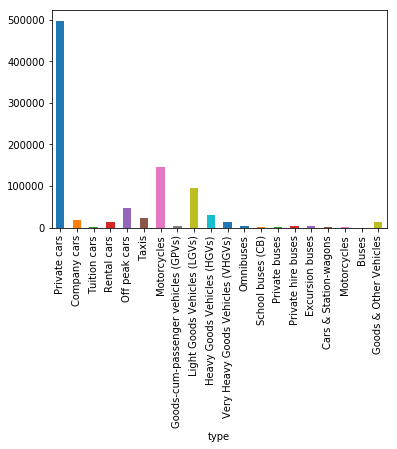

In [205]:
# plot the bar chart
#foo.plot.bar()

foo.plot(kind='bar')

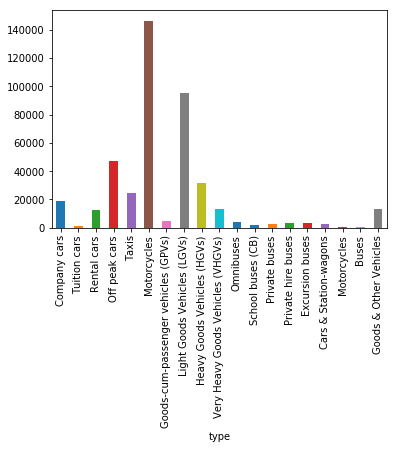

In [206]:
# Let's ignore private cars because they outweigh everything else
foo[foo.index != "Private cars"].plot.bar()

### Pivot Table

Pandas supports creating a pivot table, similar to what is available from Excel. 

This is useful when we would like to group categories by year, and then display them in stacked bar plots, with year on the x-axis.

[pandas.pivot_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)

[bar plots](https://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots)

### Why pivot table?

The original dataset has each category as a separate entry in the `category` column.

|year|category|type|number|
|--|--|--|--|
|2005-01-01|Cars & Station-wagons|Private cars|401638|
|2005-01-01|Cars & Station-wagons|Company cars|14926|

For the bar plot, we need each category as a separate column. The entry under each category will be the number of vehicles for that year.

Something like:

|year|Buses|Cars & Station-wagons|Goods & Other Vehicles|...|
|--|--|--|--|
|2005-01-01|2640|438194|128193|...|
|2006-01-01|...|...|...|...|

In [207]:
# Original dataset, filtered by year 2005 as an illustration
df[df.index == pd.to_datetime('2005')]

,category,type,number
year,,,
2005-01-01,Cars & Station-wagons,Private cars,401638
2005-01-01,Cars & Station-wagons,Company cars,14936
2005-01-01,Cars & Station-wagons,Tuition cars,917
2005-01-01,Cars & Station-wagons,Rental cars,7756
2005-01-01,Cars & Station-wagons,Off peak cars,12947
2005-01-01,Taxis,Taxis,22383
2005-01-01,Motorcycles,Motorcycles,138588
2005-01-01,Goods & Other Vehicles,Goods-cum-passenger vehicles (GPVs),5697
2005-01-01,Goods & Other Vehicles,Light Goods Vehicles (LGVs),85891


Create pivot table that is:
- indexed by year
- using category as the columns
- numbers as values

Each category has multiple entries (one for each type), so we also need to specify this:
- aggregate function to sum up the numbers for that category

In [210]:
import numpy as np
pv_year_category = pd.pivot_table(df, index="year", columns="category",
                                  values="number", aggfunc=np.sum)

pv_year_category

category,Buses,Cars & Station-wagons,Cars and Station-wagons,Goods & Other Vehicles,Goods and Other Vehicles,Motorcycles,Motorcycles and Scooters,Tax Exempted Vehicles,Taxis
year,,,,,,,,,
2005-01-01,13220.0,438194.0,NaN,128193.0,NaN,138588.0,NaN,14414.0,22383.0
2006-01-01,13831.0,472308.0,NaN,132841.0,NaN,141881.0,NaN,15178.0,23334.0
2007-01-01,14192.0,514685.0,NaN,138604.0,NaN,143482.0,NaN,15927.0,24446.0
2008-01-01,14976.0,550455.0,NaN,142966.0,NaN,145288.0,NaN,16697.0,24300.0
2009-01-01,15659.0,576988.0,NaN,144802.0,NaN,146337.0,NaN,17030.0,24702.0
2010-01-01,15936.0,595185.0,NaN,143613.0,NaN,147282.0,NaN,17740.0,26073.0
2011-01-01,16652.0,603723.0,NaN,145158.0,NaN,145680.0,NaN,18440.0,27051.0
2012-01-01,16768.0,617570.0,NaN,145046.0,NaN,143286.0,NaN,19030.0,28210.0
2013-01-01,17065.0,621345.0,NaN,144202.0,NaN,144307.0,NaN,19556.0,27695.0


Hmm, there are some NaN values.

On closer examination, the culprit is 2017, where "and" replaced "&" in the category name.

We will need to fix those entries so that the name matches.

### Question
Can you explain why can't we just use `dropna(axis=1)` to drop columns with NaN?

In [211]:
# Show the problematic dataframes (2017)
df_2017 = df.loc[pd.to_datetime('2017'), :]
df_2017

,category,type,number
year,,,
2017-01-01,Cars and Station-wagons,Private cars,502187
2017-01-01,Cars and Station-wagons,Company cars,24196
2017-01-01,Cars and Station-wagons,Tuition cars,843
2017-01-01,Cars and Station-wagons,Rental cars,68083
2017-01-01,Cars and Station-wagons,Off peak cars,16947
2017-01-01,Taxis,Taxis,23140
2017-01-01,Motorcycles and Scooters,Motorcycles and Scooters,141304
2017-01-01,Goods and Other Vehicles,Goods-cum-passenger vehicles (GPVs),2972
2017-01-01,Goods and Other Vehicles,Light Goods Vehicles (LGVs),94724


### Exercise

Fix the category names for year = 2017 by replacing "and" with "&".

Avoid looping on individual rows.

For a given category, you can:
1. Use the syntax `df.loc[row_indexer, col_indexer]` to get a **view** for each incorrect category
2. Assign the correct value to that view

#### Note on why we use `DataFrame.loc`:

Using `df.loc` with assignment will avoid this SettingWithCopyWarning, because loc returns a view, not a copy of the DataFrame:
```
Traceback (most recent call last)
     ...
SettingWithCopyWarning:
     A value is trying to be set on a copy of a slice from a DataFrame.
     Try using .loc[row_index,col_indexer] = value instead
```

In [223]:
# Your code needs to fix these categories:


#
#     Incorrect                   Correct
#     ---------------------------------------------------
#     Cars and Station-wagons     Cars & Station-wagons
#     Goods and Other Vehicles    Goods & Other Vehicles
#     Motorcycles and Scooters      Motorcycles
#     ----------------------------------------------------
#

# Your code here

df.loc[(df.index == pd.to_datetime('2017')) & \
       (df.category == 'Goods and Other Vehicles'), 'category'] \
  = 'Goods & Other Vehicles'

df.loc[(df.index == pd.to_datetime('2017')) & \
       (df.category == 'Cars and Station-wagons'), 'category'] \
  = 'Cars & Station-wagons'

df.loc[(df.index == pd.to_datetime('2017')) & \
       (df.category == 'Motorcycles and Scooters'), 'category'] \
  = 'Motorcycles'

#df.loc[pd.to_datetime('2017')]

# Let's generate the pivot_table again, the NaNs should now go away
pv_year_category = pd.pivot_table(df, index="year", columns="category",
                                  values="number", aggfunc=np.sum)

pv_year_category

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Let's plot the bar chart.

We are doing a bit more matplotlib stuff here to make the bar chart readable.

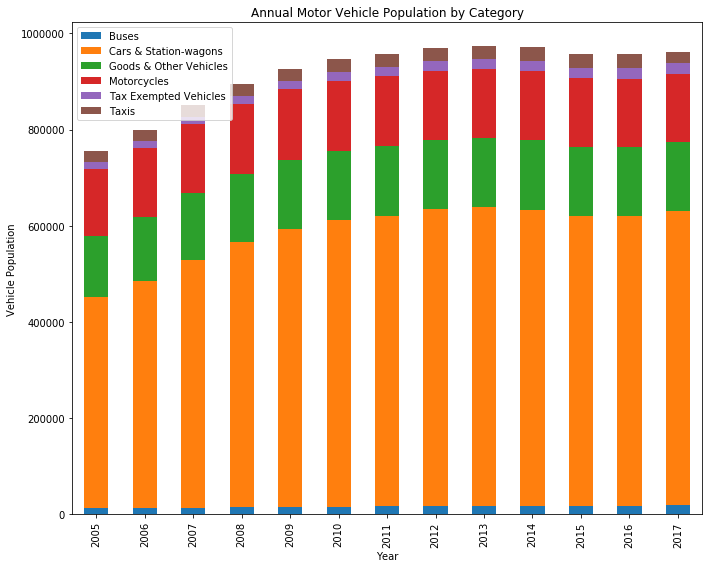

In [222]:
fig, ax = plt.subplots(figsize=(10,8))

pv_year_category.plot(kind='bar', stacked=True, ax=ax)
ax.set(title='Annual Motor Vehicle Population by Category',
       ylabel='Vehicle Population',
       xlabel='Year')
ax.legend(loc='upper left')

# Due to: https://github.com/pandas-dev/pandas/issues/1918
# Can't just do: ax.xaxis.set_major_formatter(mdates.FormatStrFormatter('%Y'))
ax.xaxis.set_major_formatter(plt.FixedFormatter(pv_year_category.index.to_series().dt.strftime("%Y")))

fig.tight_layout()
plt.show()

In [9]:
import pandas as pd

df = pd.read_csv('D:/tmp/motor-vehicles/annual-motor-vehicle-population-by-vehicle-type.csv',
                 parse_dates=['year'], index_col=0, infer_datetime_format=True)

df 
df['category'][df['category'] == 'Goods & Other Vehicles'] = 'haa'

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
df.category.unique()

array(['Cars & Station-wagons', 'Taxis', 'Motorcycles', 'haa', 'Buses',
       'Tax Exempted Vehicles', 'Cars and Station-wagons',
       'Motorcycles and Scooters', 'Goods and Other Vehicles'],
      dtype=object)

In [11]:
df2 = pd.read_csv('D:/tmp/motor-vehicles/annual-motor-vehicle-population-by-vehicle-type.csv',
                 parse_dates=['year'], index_col=0, infer_datetime_format=True)

df2
df2['category'][df2['category'] == 'Cars and Station-wagons'] = 'Cars & Station-wagons'

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
df2.category.unique()

array(['Cars & Station-wagons', 'Taxis', 'Motorcycles',
       'Goods & Other Vehicles', 'Buses', 'Tax Exempted Vehicles',
       'Cars and Station-wagons', 'Motorcycles and Scooters',
       'Goods and Other Vehicles'], dtype=object)